In [1]:
import pandas as pd
import numpy as np

## 1. LOAD DATA WITH PREPROCESSING

In [6]:
from src.utils.data_explorer import data_loader

data = data_loader("../dataset/", ["train.csv", "test.csv"])
train_data = data["train_data"].set_index("Id")
test_data = data["test_data"].set_index("Id")

train_data.head()

📁 DATA LOADER SUMMARY
✅ train.csv: 1,168 row * 271 columns
✅ test.csv: 292 row * 271 columns

📊 Total files loaded: 2


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
255,-0.866764,-0.012468,-0.212896,-0.820445,0.372217,-0.455469,-1.346063,-0.597889,1.037269,-0.285504,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,145000
1067,0.074110,-0.502357,-0.265245,-0.088934,1.268609,0.718609,0.439214,-0.597889,-0.971996,-0.285504,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,178000
639,-0.631546,-0.146074,-0.177841,-0.820445,1.268609,-1.988293,-1.683818,-0.597889,-0.971996,-0.285504,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,85000
800,-0.161109,-0.457822,-0.324474,-0.820445,1.268609,-1.107734,-1.683818,0.861522,0.267995,-0.285504,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,175000
381,-0.161109,-0.903175,-0.529035,-0.820445,0.372217,-1.531707,-1.683818,-0.597889,-0.496920,-0.285504,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,127000


In [7]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]
print("Training data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Training data shape:  (1168, 269)
Test data shape:  (292, 269)


## 3. MODEL TRAIN & PROCESSING

✅ Fitting data completion!
0.8681057853621519


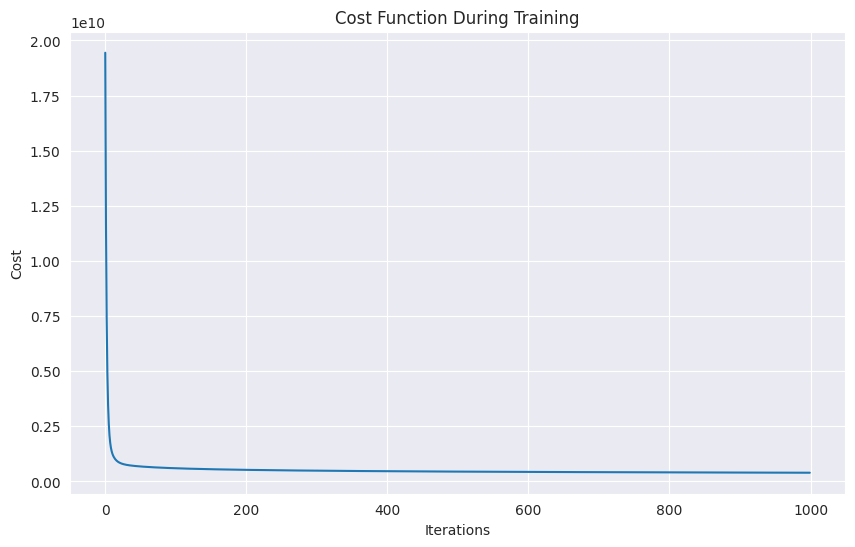

In [13]:
from src.utils.model_built import LRRegularizationVectorized

LRR = LRRegularizationVectorized(
    method="gradient",
    n_iterators= 1000,
    learning_rate=0.01,
)

LRR.fit(X_train, y_train)
y_pred = LRR.predict(X_test)
print(LRR.score(X_test, y_test))
LRR.plot_cost_history()